In [1]:
from IPython.display import HTML
file_path = 'images/mle_map.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [4]:
from IPython.display import HTML
file_path = 'images/mle_map2.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [2]:
from IPython.display import HTML
file_path = 'images/text.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [1]:
import numpy as np
import matplotlib.pyplot as mlp

In [2]:
K = int(input("Enter the degree of the polynomial K: "))
while True:
    a = float(input("Enter the start of the range a: "))
    b = float(input("Enter the end of the range b: "))
    if a < b:
        break
    else:
        print("The start of the range must be less than the end of the range. Please try again.")

N = int(input("Enter the number of data points N: "))

X = np.linspace(a, b, N)

theta_true = np.ones((K+1,))

def f(X, theta):
    Phi_X = np.vander(X, len(theta), increasing=True)
    Y = Phi_X @ theta
    return Y


sigma = float(input("Enter the variance of the Gaussian noise sigma^2: "))
Y = f(X, theta_true) + np.random.normal(0, np.sqrt(sigma), N)
print(f"Generated test dataset for variance {sigma}:")
print("X:", X)
print("Y:", Y)

# Grado del Polinomio (K): 2
# Intervallo (a, b): 0, 10
# Numero di Punti Dati (N): 100
# Varianza del Rumore (sigma^2): 1

Generated test dataset for variance 1.0:
X: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.878

In [3]:
import numpy as np
a = 0
b = 2
N = 200
X_train = np.linspace(a, b, N)
K = 5
theta_true = np.ones(K+1)
sigma_train = 10
Y_train = f(X_train, theta_true) + np.random.normal(0, np.sqrt(sigma_train), N)
D = (X_train, Y_train)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of theta_true: {theta_true.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

Shape of X_train: (200,)
Shape of theta_true: (6,)
Shape of Y_train: (200,)


In [4]:
# Normal equations
def compute_mle(D, K):
    X, Y = D  
    Phi_X = np.vander(X, K+1, increasing=True) 
    theta_mle = np.linalg.inv(Phi_X.T @ Phi_X) @ Phi_X.T @ Y
    return theta_mle

#Cholesky Normal equations
# def compute_mle(D, K):
#     X, Y = D
#     Phi_X = np.vander(X, K+1, increasing=True)
#     cholesky_factor = np.linalg.cholesky(Phi_X.T @ Phi_X)
#     # L * y = Phi_X.T * Y
#     y = np.linalg.solve(cholesky_factor, Phi_X.T @ Y)  
#     # Risoluzione del sistema triangolare superiore L.T * theta = y
#     theta_mle = np.linalg.solve(cholesky_factor.T, y)
    
#     return theta_mle

def average_absolute_error(theta, T_E):
    X_test, Y_test = T_E
    # Compute the predictions using the polynomial model
    predictions = np.vander(X_test, len(theta), increasing=True) @ theta
    # Calculate the average absolute error
    error = np.linalg.norm(predictions - Y_test, 2) / len(X_test)
    return error

def average_relative_error(theta, T_E):
    X_test, Y_test = T_E
    predictions = np.vander(X_test, len(theta), increasing=True) @ theta
    epsilon = 1e-10
    relative_errors = np.abs((predictions - Y_test) / (Y_test + epsilon))
    error = np.mean(relative_errors)
    return error


theta_mle = compute_mle(D, K)
print("Coefficients MLE:", theta_mle)

a_test = 0
b_test = 2
N_test = N*2//5  
sigma_test = 50
X_test = np.linspace(a_test, b_test, N_test)
K_test = len(theta_true) - 1 
X_test = np.linspace(a_test, b_test, N_test)
Y_test = f(X_test, theta_true) + np.random.normal(0, np.sqrt(sigma_test), N_test)
T_E = (X_test, Y_test)

# Assuming theta (parameter vector) and T_E (test set) have been previously defined
error = average_absolute_error(theta_mle, T_E)
print("Average Absolute Error:", error)
# Calcola l'errore relativo medio
relative_error = average_relative_error(theta_mle, T_E)
print("Average Relative Error:", relative_error)

Coefficients MLE: [ 1.04774923  4.72419388 -7.34192319  3.20154912  3.85612327 -0.1882388 ]
Average Absolute Error: 0.7964066201817768
Average Relative Error: 1.417726541556463


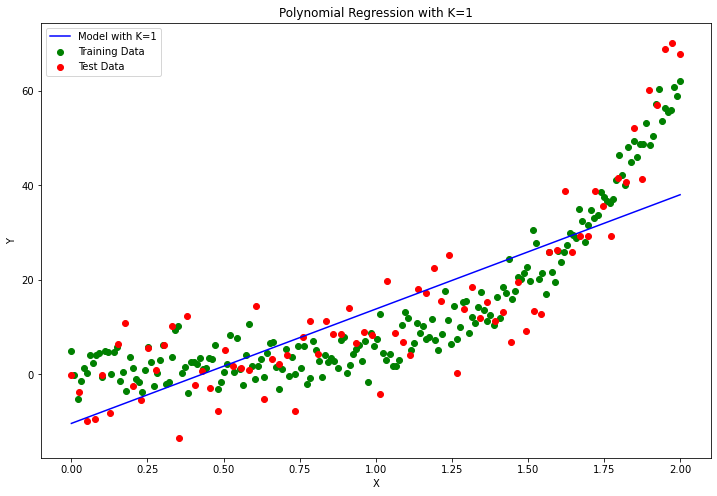

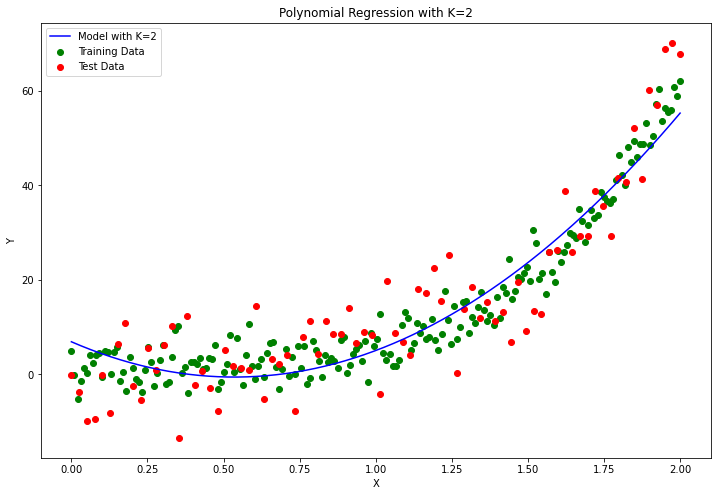

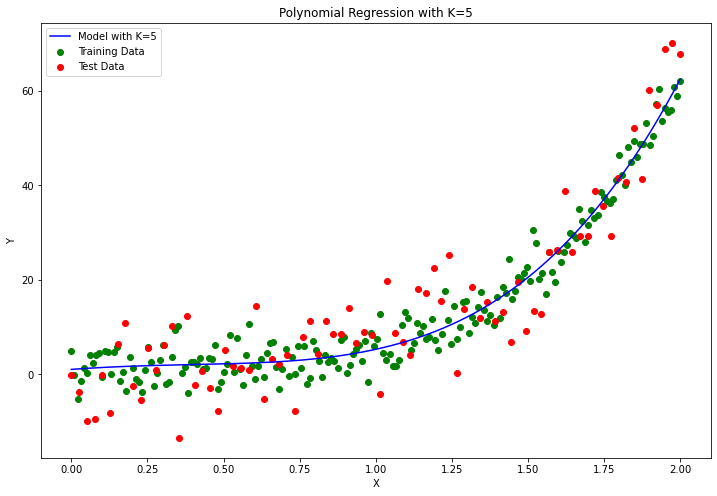

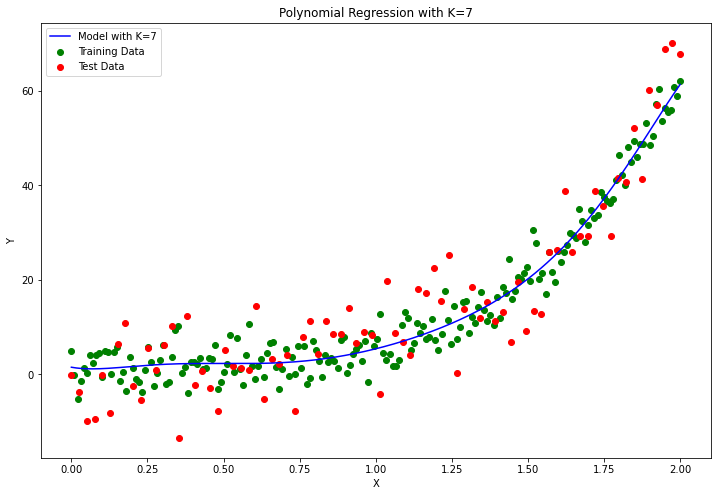

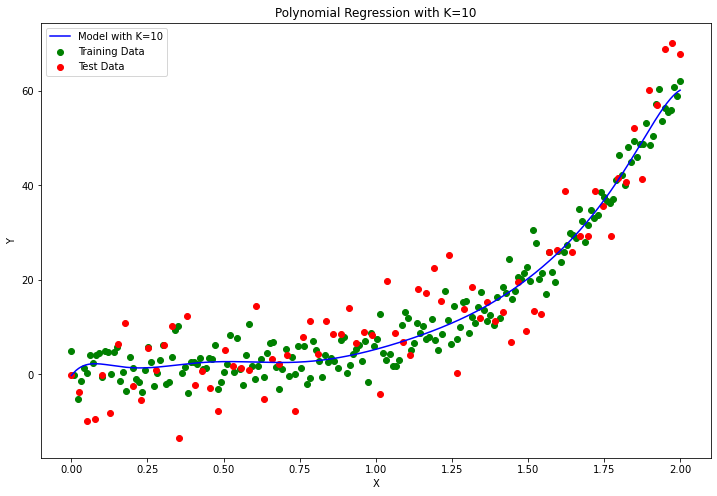

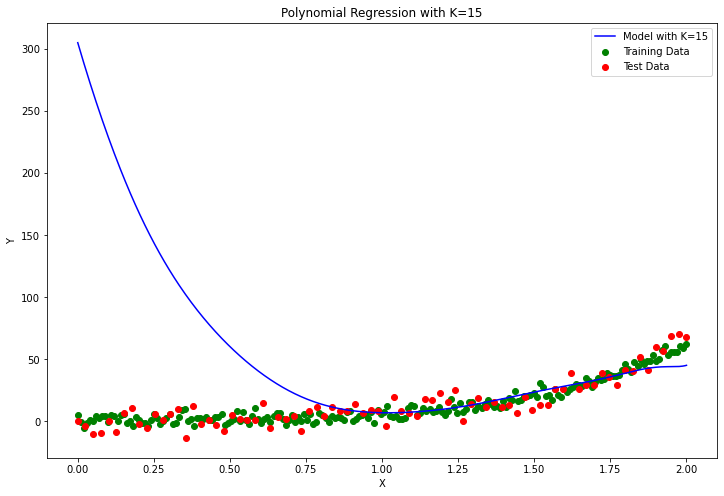

In [6]:
import matplotlib.pyplot as plt

K_values = [1, 2, 5, 7,10,15]  
X_vis = np.linspace(np.min(X_train), np.max(X_train), 500)  

# for K in K_values:
#     theta_MLE = compute_mle(D, K)

#     Phi_X_vis = np.vander(X_vis, K+1, increasing=True)
#     Y_vis = Phi_X_vis @ theta_MLE

#     # Crea il grafico
#     plt.figure()
#     plt.scatter(X_train, Y_train, color='blue', label='Training Data')
#     plt.scatter(X_test, Y_test, color='red', label='Test Data')
#     plt.plot(X_vis, Y_vis, color='green', label=f'Model with K={K}')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title(f'Polynomial Regression with K={K}')
#     plt.legend()
#     plt.show()

def f(X, theta):
    Phi_X = np.vander(X, len(theta), increasing=True)
    return Phi_X @ theta

for K in K_values:
    theta_MLE = compute_mle(D, K)
    Y_vis = f(X_vis, theta_MLE)  # Usa la funzione f per calcolare Y_vis

    plt.figure(figsize=(12,8))
    plt.scatter(X_train, Y_train, color='green', label='Training Data')
    plt.scatter(X_test, Y_test, color='red', label='Test Data')
    plt.plot(X_vis, Y_vis, color='blue', label=f'Model with K={K}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression with K={K}')
    plt.legend()
    plt.show()


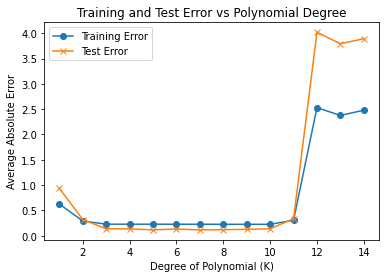

In [7]:
import matplotlib.pyplot as plt

K_values = range(1, 15)
training_errors = []
test_errors = []

for K in K_values:
    theta_mle = compute_mle(D, K)

    train_error = average_absolute_error(theta_mle, D)
    training_errors.append(train_error)

    X_test = np.linspace(a, b, N_test)
    Y_test = f(X_test, theta_true) + np.random.normal(0, np.sqrt(sigma), N_test)
    T_E = (X_test, Y_test)
    test_error = average_absolute_error(theta_mle, T_E)
    test_errors.append(test_error)

plt.figure()
plt.plot(K_values, training_errors, label='Training Error', marker='o')
plt.plot(K_values, test_errors, label='Test Error', marker='x')
plt.xlabel('Degree of Polynomial (K)')
plt.ylabel('Average Absolute Error')
plt.title('Training and Test Error vs Polynomial Degree')
plt.legend()
plt.show()

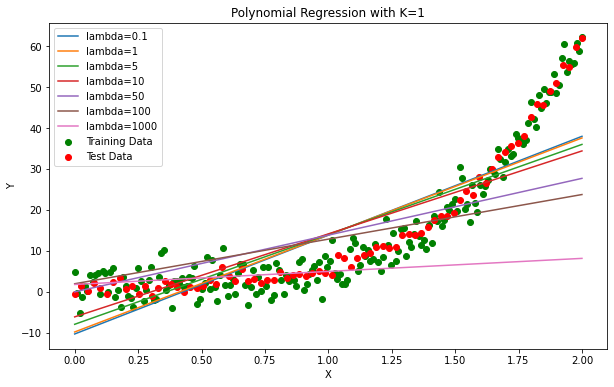

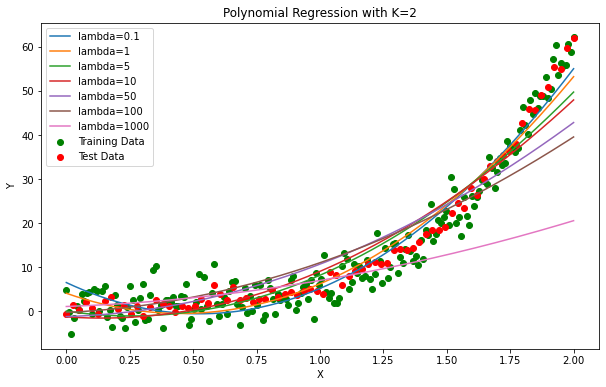

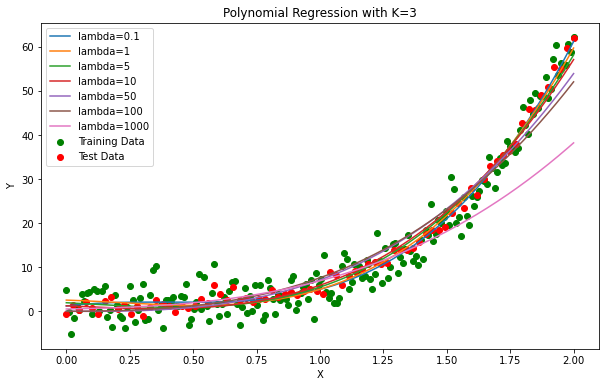

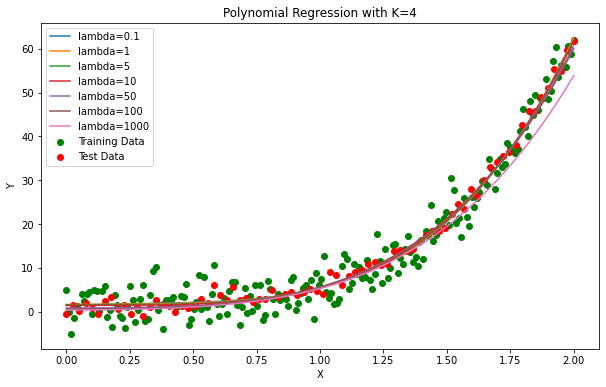

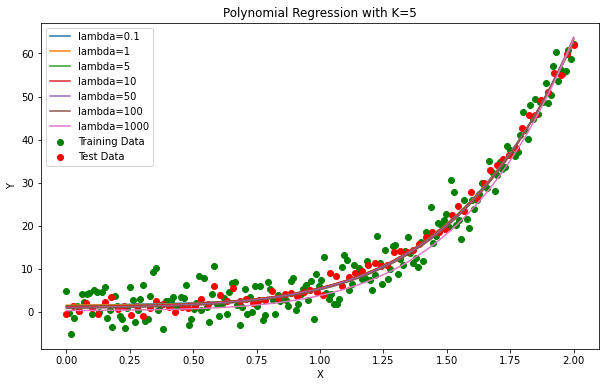

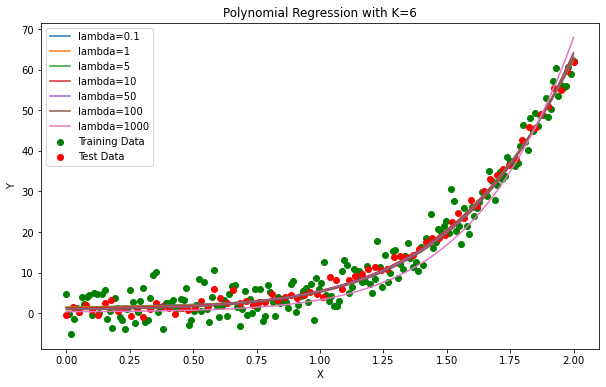

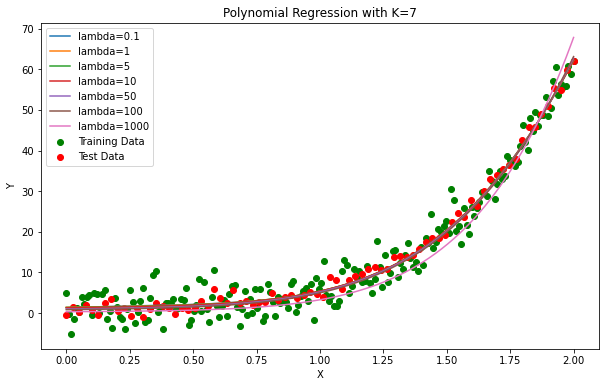

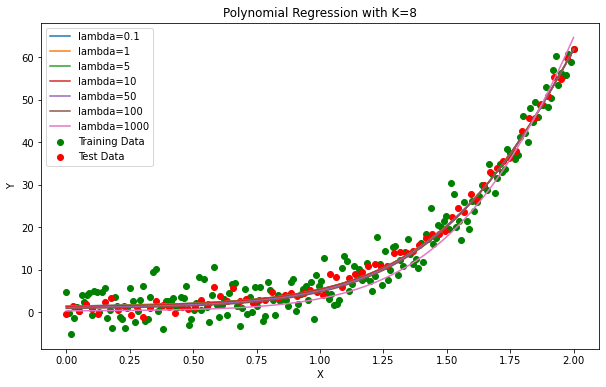

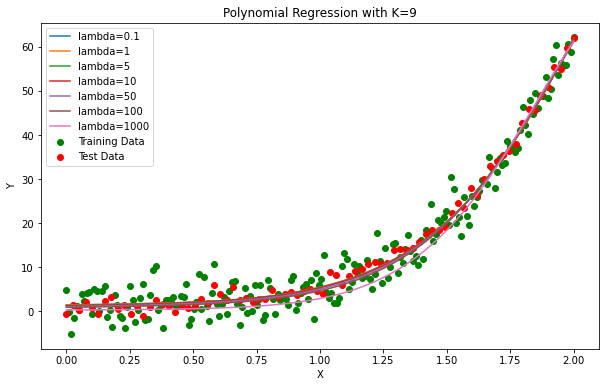

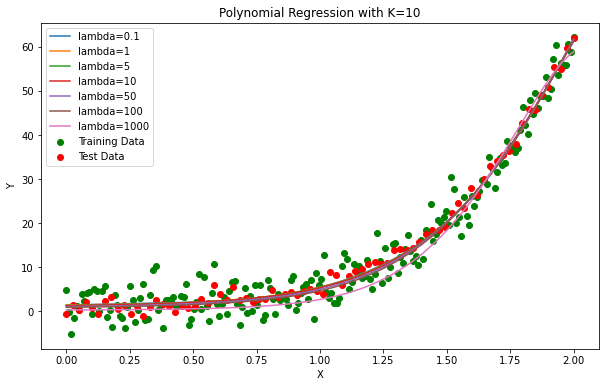

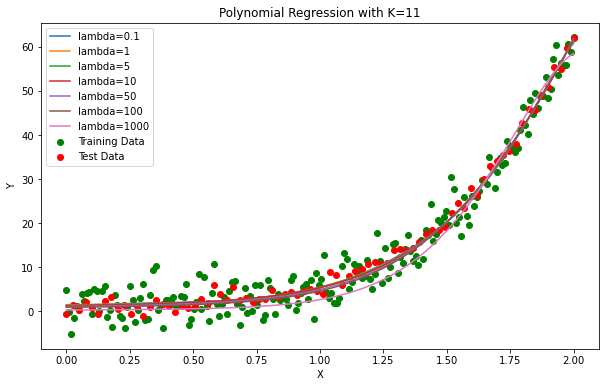

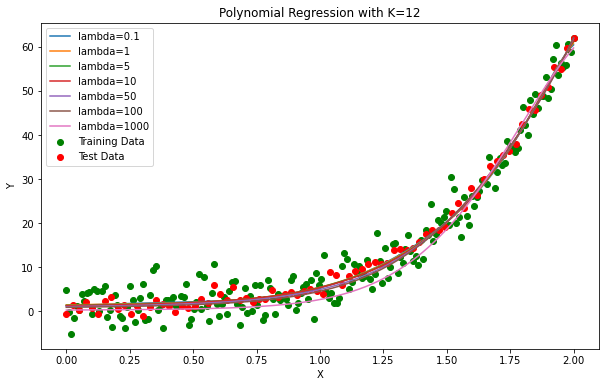

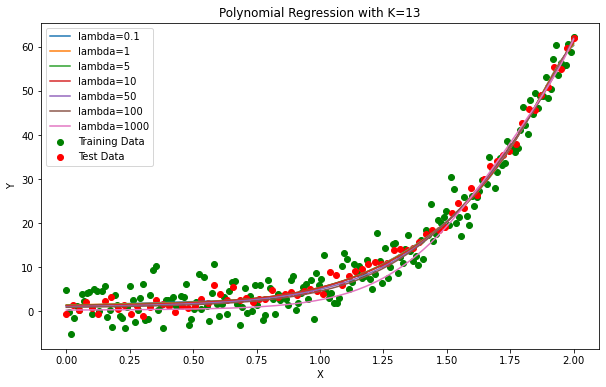

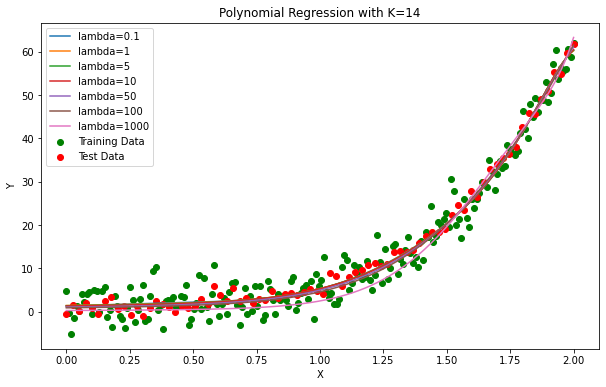

In [9]:
def compute_map(D, K, lam):
    X, Y = D
    Phi_X = np.vander(X, K+1, increasing=True)
    regularization_term = lam * np.eye(Phi_X.shape[1])
    theta_map = np.linalg.solve(Phi_X.T @ Phi_X + regularization_term, Phi_X.T @ Y)
    return theta_map

lambda_values = [0.1, 1, 5,10,50,100,1000] 
X_vis = np.linspace(np.min(X_train), np.max(X_train), 500) 

for K in K_values:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='green', label='Training Data')
    plt.scatter(X_test, Y_test, color='red', label='Test Data')
    
    for lambd in lambda_values:
        theta_MAP = compute_map(D, K, lambd)
        Phi_X_vis = np.vander(X_vis, K+1, increasing=True)
        Y_vis = Phi_X_vis @ theta_MAP
        plt.plot(X_vis, Y_vis, label=f'lambda={lambd}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression with K={K}')
    plt.legend()
    plt.show()

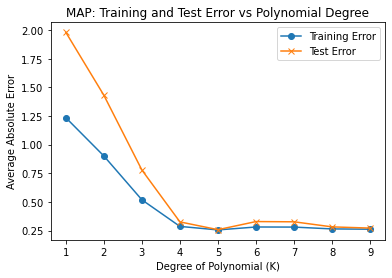

In [10]:
lambd = 1000
K_values = range(1, 10)
training_errors = []
test_errors = []

for K in K_values:
    theta_map = compute_map(D, K, lambd)

    train_error = average_absolute_error(theta_map, D)
    training_errors.append(train_error)

    test_error = average_absolute_error(theta_map, T_E)
    test_errors.append(test_error)

plt.figure()
plt.plot(K_values, training_errors, label='Training Error', marker='o')
plt.plot(K_values, test_errors, label='Test Error', marker='x')
plt.xlabel('Degree of Polynomial (K)')
plt.ylabel('Average Absolute Error')
plt.title('MAP: Training and Test Error vs Polynomial Degree')
plt.legend()
plt.show()

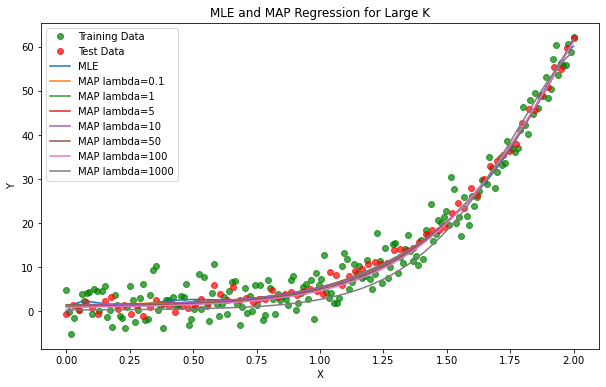

In [12]:
K_new = 10
theta_mle = compute_mle(D, K_new)

X_vis = np.linspace(np.min(X_train), np.max(X_train), 500)
Phi_X_vis = np.vander(X_vis, K_new+1, increasing=True)
Y_vis_mle = Phi_X_vis @ theta_mle

plt.figure(figsize=(10, 6))
plt.plot(X_train, Y_train, 'o', color='green', label='Training Data', alpha=0.7)
plt.plot(X_test, Y_test, 'o', color='red', label='Test Data', alpha=0.7)

plt.plot(X_vis, Y_vis_mle, label='MLE')

lambda_values = [0.1, 1, 5, 10, 50, 100, 1000]
for lambd in lambda_values:
    theta_map = compute_map(D, K_new, lambd)
    Y_vis_map = Phi_X_vis @ theta_map
    plt.plot(X_vis, Y_vis_map, label=f'MAP lambda={lambd}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('MLE and MAP Regression for Large K')
plt.legend()
plt.show()

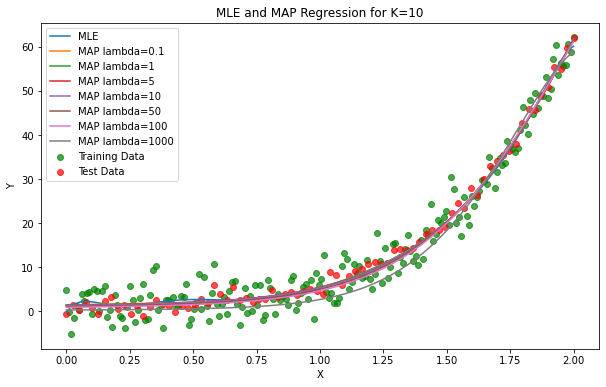

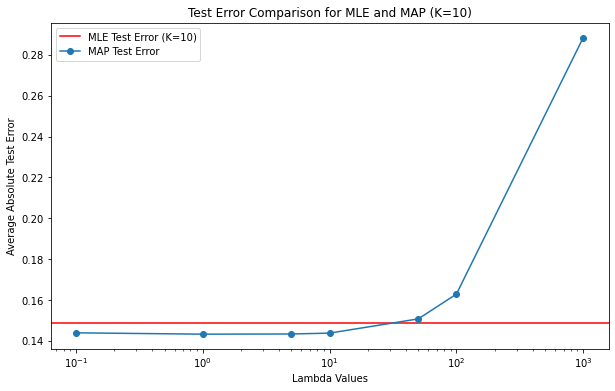

MLE Test Error (K=10): 0.14903818890970505
MAP Test Errors for different lambda values: [0.1440406279018708, 0.14337969424150437, 0.14346957108718705, 0.14390139851734787, 0.15084703927024282, 0.16296529610438992, 0.2883703543044513]


In [13]:
K_new = 10  
theta_mle = compute_mle(D, K_new) 

X_vis = np.linspace(np.min(X_train), np.max(X_train), 500)  
Phi_X_vis = np.vander(X_vis, K_new + 1, increasing=True)  
Y_vis_mle = Phi_X_vis @ theta_mle  

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', label='Training Data', alpha=0.7)  
plt.scatter(X_test, Y_test, color='red', label='Test Data', alpha=0.7)  

plt.plot(X_vis, Y_vis_mle, label='MLE') 

lambda_values = [0.1, 1, 5, 10, 50, 100, 1000]
for lambd in lambda_values:
    theta_map = compute_map(D, K_new, lambd)  
    Y_vis_map = Phi_X_vis @ theta_map  
    plt.plot(X_vis, Y_vis_map, label=f'MAP lambda={lambd}')  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MLE and MAP Regression for K=10')
plt.legend()
plt.show()



theta_mle = compute_mle(D, K_new)
mle_test_error = average_absolute_error(theta_mle, (X_test, Y_test))

map_test_errors = []

for lambd in lambda_values:
    theta_map = compute_map(D, K_new, lambd)
    map_test_error = average_absolute_error(theta_map, (X_test, Y_test))
    map_test_errors.append(map_test_error)

plt.figure(figsize=(10, 6))
plt.axhline(y=mle_test_error, color='r', linestyle='-', label=f'MLE Test Error (K={K_new})')
plt.plot(lambda_values, map_test_errors, label='MAP Test Error', marker='o')
plt.xscale('log')
plt.xlabel('Lambda Values')
plt.ylabel('Average Absolute Test Error')
plt.title(f'Test Error Comparison for MLE and MAP (K={K_new})')
plt.legend()
plt.show()

print(f"MLE Test Error (K={K_new}):", mle_test_error)
print("MAP Test Errors for different lambda values:", map_test_errors)

MLE Errors for increasing K:
[107.01969789758388, 781.8043423224105, 2850.5554206500224, 8660.113231883792, 41066.14861143392, 72014.5113719006, 533970.7035754803, 369642.0082560581, 146793.52767459187]
MAP Errors for K=6 with different lambda values:
[3.433641517075752, 2.3111736183929783, 1.857053043689216, 1.6919878187668567, 1.4209380688502775, 1.3053578773421988, 0.8602328151102215, 0.9457237256691506, 0.9965068597931639]
MAP Errors for K=7 with different lambda values:
[2.3681156158395633, 1.7378334387227723, 1.6147859617016413, 1.5516716131074269, 1.3874994515655945, 1.311542299282677, 0.8712753694934489, 0.7837936017650216, 0.8287929973095957]
MAP Errors for K=8 with different lambda values:
[2.7187334309120645, 1.479993455343047, 1.3855900602743307, 1.3505877745110082, 1.2194845533607934, 1.1463710671099205, 0.9843753742279644, 0.8667275373206963, 0.8444163866061989]
MAP Errors for K=9 with different lambda values:
[4.4881692298996025, 1.523246112813558, 1.3532147637832723, 1.

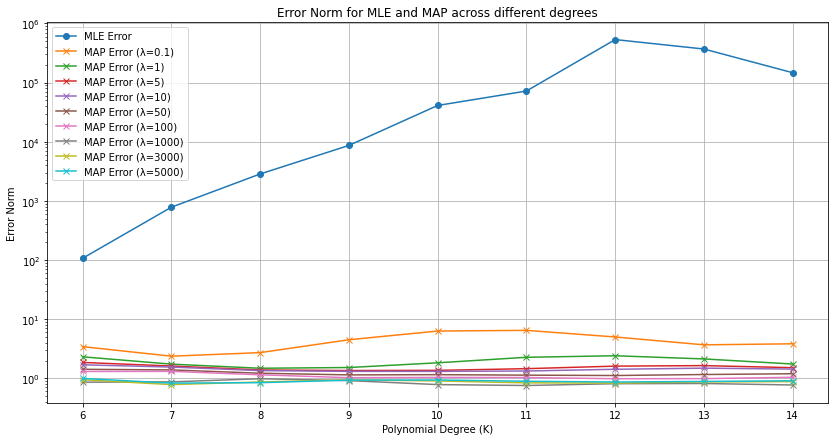

In [14]:
def error_norm(theta, theta_true):
    theta_true_extended = np.concatenate([theta_true, np.zeros(len(theta) - len(theta_true))])
    err = np.linalg.norm(theta - theta_true_extended, 2) / np.linalg.norm(theta_true, 2)
    return err

K_true = 5  
theta_true = np.random.rand(K_true + 1) 

mle_errors = []
map_errors = {}

K_values = range(K_true + 1, K_true + 10)  
lambda_values = [0.1, 1, 5, 10, 50, 100, 1000,3000,5000]

for K in K_values:
    theta_mle = compute_mle(D, K)
    mle_errors.append(error_norm(theta_mle, theta_true))

    map_errors[K] = []
    for lambd in lambda_values:
        theta_map = compute_map(D, K, lambd)
        map_error = error_norm(theta_map, theta_true)
        map_errors[K].append(map_error)


print("MLE Errors for increasing K:")
print(mle_errors)
for K in K_values:
    print(f"MAP Errors for K={K} with different lambda values:")
    print(map_errors[K])


plt.figure(figsize=(14, 7))

# MLE errors
plt.plot(K_values, mle_errors, label='MLE Error', marker='o')

for i, lambd in enumerate(lambda_values):
    errors = [map_errors[K][i] for K in K_values]
    plt.plot(K_values, errors, label=f'MAP Error (λ={lambd})', marker='x')

plt.xlabel('Polynomial Degree (K)')
plt.ylabel('Error Norm')
plt.title('Error Norm for MLE and MAP across different degrees')
plt.yscale('log')  
plt.legend()
plt.grid(True)
plt.show()


#MLE shows higher sensitivity to dataset size, improving markedly with very large datasets. However, it experiences significant error fluctuations with increasing N.
#MAP, with regularization, provides more stable and consistent results, particularly for medium to large datasets. Optimal lambda offer the best balance between fitting and overfitting.

In [15]:
N_values = [100, 200, 500, 1000,3000,5000,10000,200000]  

theta_true = np.random.rand(K_true + 1) 
mle_errors_by_N = []
map_errors_by_N = {lambd: [] for lambd in lambda_values}

for N in N_values:
    X_train = np.linspace(a, b, N)
    Y_train = f(X_train, theta_true) + np.random.normal(0, sigma_train, N)
    D = (X_train, Y_train)
    
    theta_mle = compute_mle(D, K_true)
    mle_error = error_norm(theta_mle, theta_true)
    mle_errors_by_N.append(mle_error)
    
    for lambd in lambda_values:
        theta_map = compute_map(D, K_true, lambd)
        map_error = error_norm(theta_map, theta_true)
        map_errors_by_N[lambd].append(map_error)

for N, mle_error in zip(N_values, mle_errors_by_N):
    print(f"N={N}, MLE Error: {mle_error}")
    
for lambd in lambda_values:
    print(f"MAP Errors for lambda={lambd}: {map_errors_by_N[lambd]}")



N=100, MLE Error: 137.08649422876798
N=200, MLE Error: 189.370997585205
N=500, MLE Error: 275.4255233762785
N=1000, MLE Error: 8.727945648137085
N=3000, MLE Error: 34.4465518161456
N=5000, MLE Error: 26.22559870594238
N=10000, MLE Error: 8.247491401423565
N=200000, MLE Error: 2.8207955561485183
MAP Errors for lambda=0.1: [14.2847324987021, 9.43823176421249, 14.529363865925207, 1.4272214109912102, 7.089406024395362, 9.388590006795036, 5.192351508062064, 2.6503458567627365]
MAP Errors for lambda=1: [4.83619171418296, 2.4201143818080824, 3.273728278151219, 1.2855174312050945, 1.1911074065341989, 3.767161791198318, 3.362240271431573, 1.6730846450655015]
MAP Errors for lambda=5: [2.168697769871992, 1.6208338162431077, 1.4256563132544227, 1.1216889207572598, 0.7535077502603836, 1.8943399119523037, 2.266620968269517, 0.5445006615084735]
MAP Errors for lambda=10: [1.5350293291840642, 1.4895135010916043, 1.024786864066331, 0.9954700608609433, 0.7005018935826788, 1.2554240958824343, 1.7395726643